# EDA


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/Covid_19_Clean_Complete.csv')
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
df.isnull().sum()

,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [ ]:
df.shape

(49068, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop(columns='Province/State',inplace=True)

In [ ]:
df.isnull().sum()

,0
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [ ]:
df.rename(columns={'Country/Region':'Country','WHO Region':'Region'},inplace=True)

In [ ]:
df.columns

Index(['Country', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths', 'Recovered',
       'Active', 'Region'],
      dtype='object')

In [ ]:
df['Date'].value_counts()

,count
Date,
2020-01-22,261
2020-05-30,261
2020-05-21,261
2020-05-22,261
2020-05-23,261
...,...
2020-03-26,261
2020-03-27,261
2020-03-28,261


In [ ]:
df['Date'].max()

'2020-07-27'

In [ ]:
df['Date'].min()

'2020-01-22'

In [ ]:
Country_group=df.groupby('Country')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()

In [ ]:
Country_group.sort_values(by='Confirmed',ascending=False)

,Country,Confirmed,Deaths,Recovered,Active
173,US,224345948,11011411,56353416,156981121
23,Brazil,89524967,3938034,54492873,31094060
138,Russia,45408411,619385,25120448,19668578
79,India,40883464,1111831,23783720,15987913
157,Spain,27404045,3033030,15093583,9277432
...,...,...,...,...,...
140,Saint Kitts and Nevis,1772,0,1295,477
68,Greenland,1507,0,1372,135
75,Holy See,1356,0,742,614
130,Papua New Guinea,1185,2,695,488


In [ ]:
confirmed_date=df.groupby('Date')['Confirmed'].sum().reset_index()
confirmed_date.head()

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [ ]:
death_date=df.groupby('Date')['Deaths'].sum().reset_index()
death_date.head()

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56


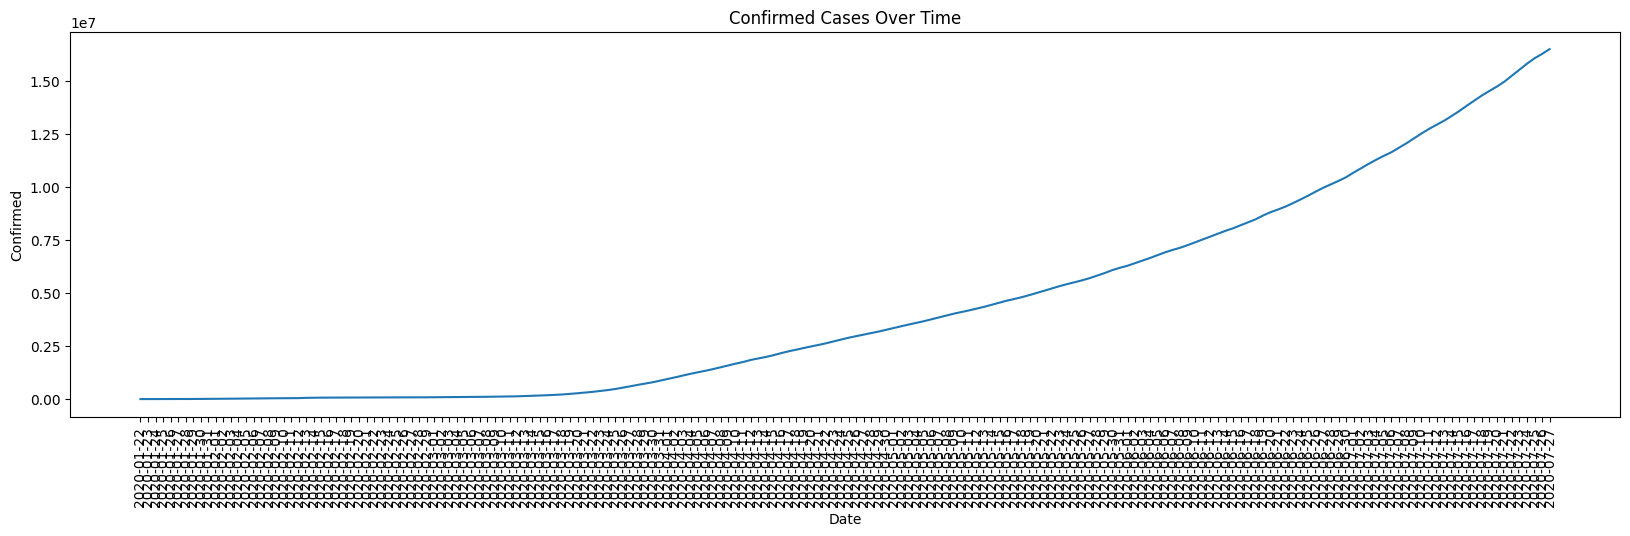

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(data=confirmed_date,x='Date',y='Confirmed')
plt.xticks(rotation=90)
plt.title('Confirmed Cases Over Time')
plt.show()

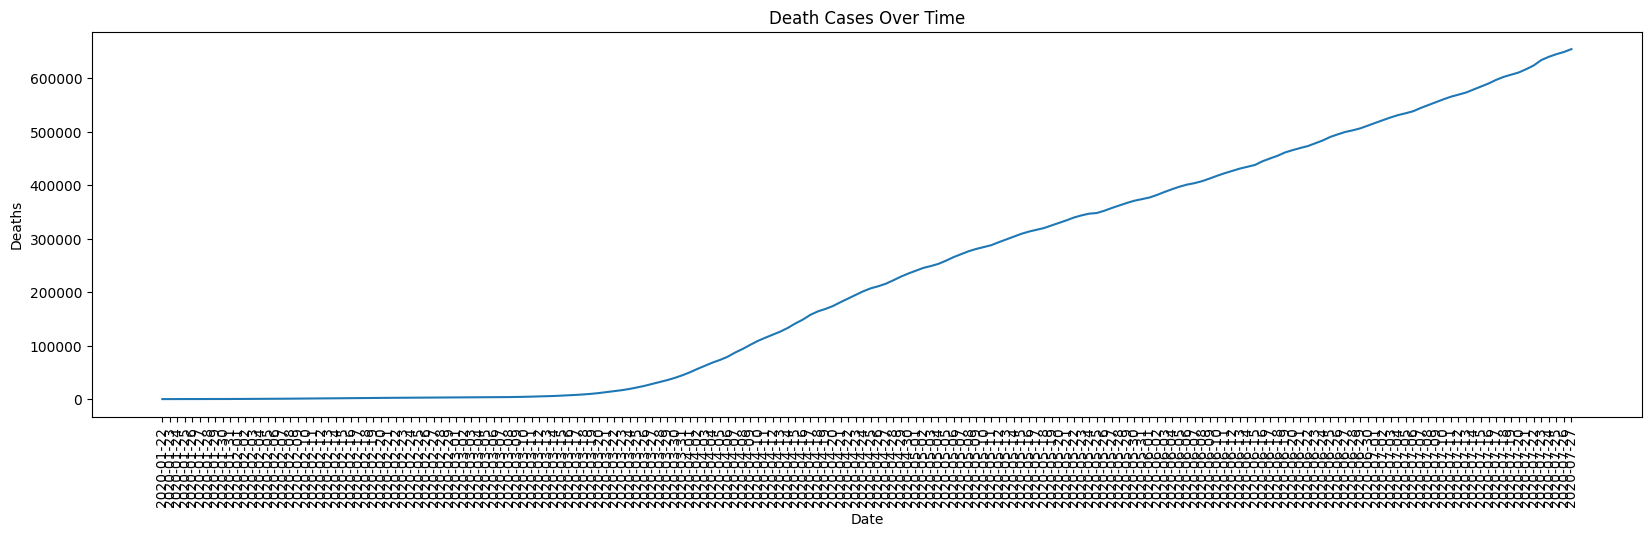

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(data=death_date,x='Date',y='Deaths')
plt.xticks(rotation=90)
plt.title('Death Cases Over Time')
plt.show()

# Top 10 Countries with the most recovered **cases**

In [ ]:
recovered_country=df.groupby('Country')['Recovered'].sum().reset_index().sort_values('Recovered',ascending=False).head(10)
recovered_country

,Country,Recovered
173,US,56353416
23,Brazil,54492873
138,Russia,25120448
79,India,23783720
65,Germany,17107839
85,Italy,15673910
81,Iran,15200895
157,Spain,15093583
172,Turkey,13345389
35,Chile,13292593


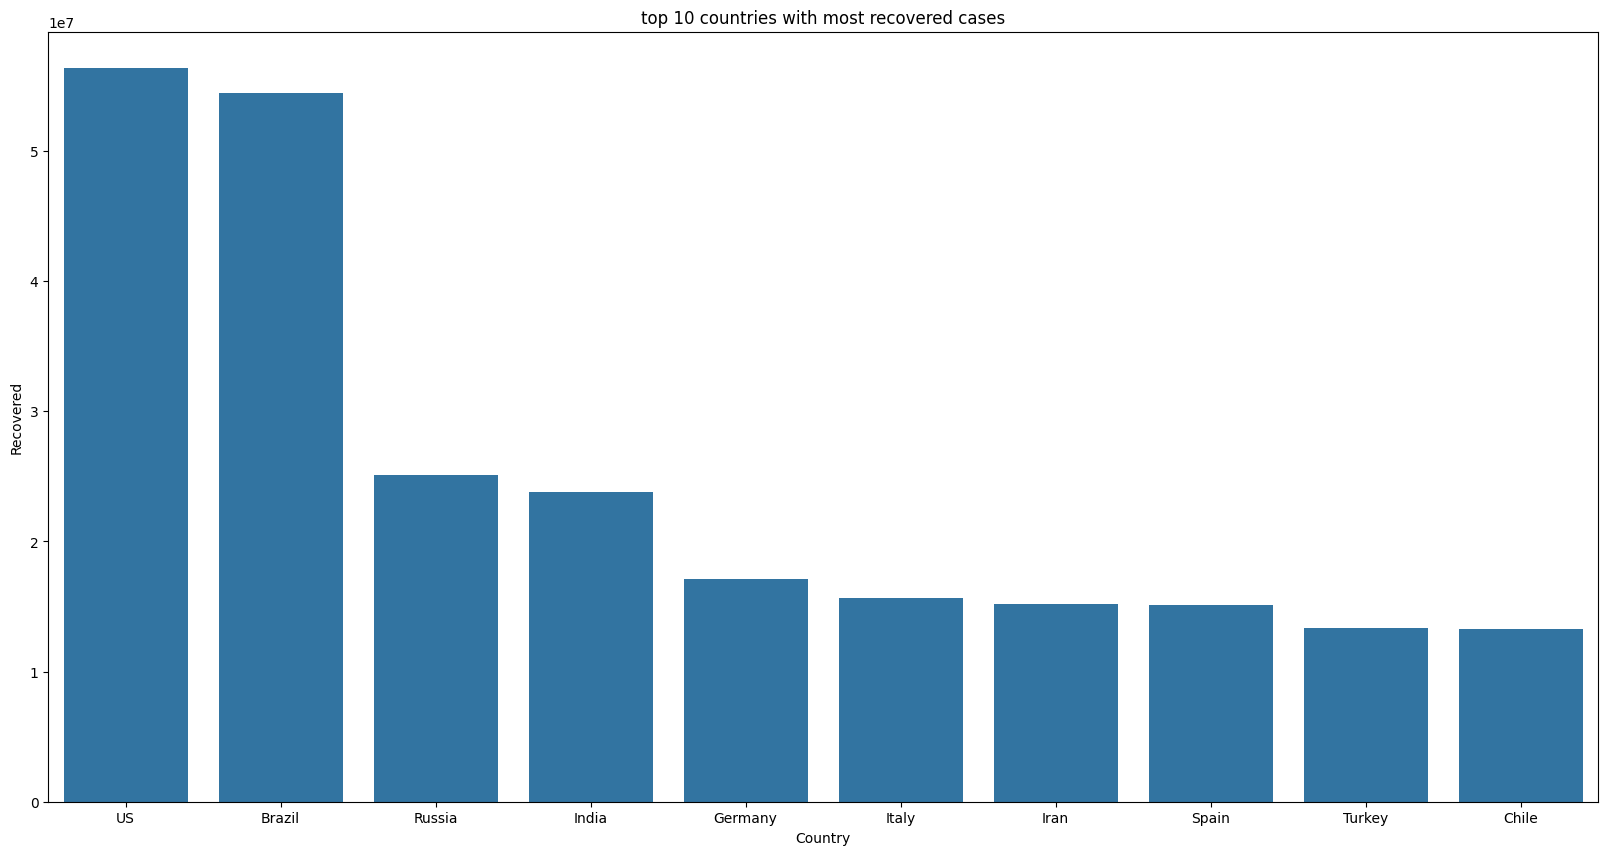

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=recovered_country,y='Recovered',x='Country')
plt.title("top 10 countries with most recovered cases")
plt.show()

# Top 10 Countries with the most Active **cases**

In [ ]:
active_country=df.groupby('Country')['Active'].sum().reset_index().sort_values('Active',ascending=False).head(10)
active_country

,Country,Active
173,US,156981121
23,Brazil,31094060
177,United Kingdom,22624595
138,Russia,19668578
79,India,15987913
61,France,10980287
157,Spain,9277432
32,Canada,8656985
132,Peru,7748957
85,Italy,7363518


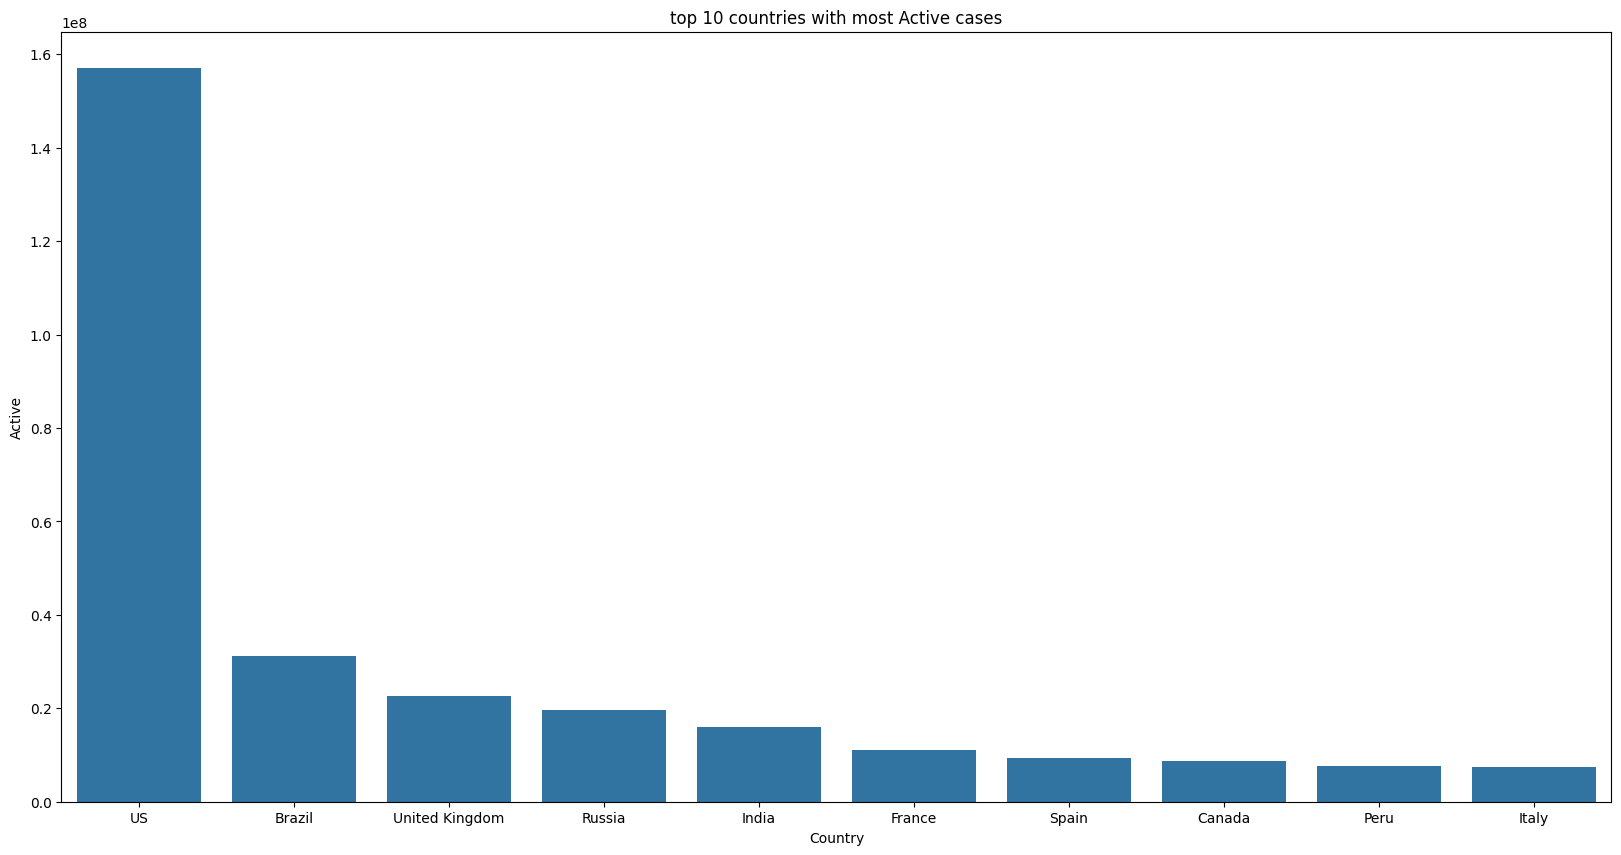

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=active_country,y='Active',x='Country')
plt.title("top 10 countries with most Active cases")
plt.show()

# **Country Based Analysis**

US
India
China


In [ ]:
US=df[df['Country']=='US']
US

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Region
223,US,40.0,-100.0,2020-01-22,1,0,0,1,Americas
484,US,40.0,-100.0,2020-01-23,1,0,0,1,Americas
745,US,40.0,-100.0,2020-01-24,2,0,0,2,Americas
1006,US,40.0,-100.0,2020-01-25,2,0,0,2,Americas
1267,US,40.0,-100.0,2020-01-26,5,0,0,5,Americas
...,...,...,...,...,...,...,...,...,...
47986,US,40.0,-100.0,2020-07-23,4038816,144430,1233269,2661117,Americas
48247,US,40.0,-100.0,2020-07-24,4112531,145560,1261624,2705347,Americas
48508,US,40.0,-100.0,2020-07-25,4178970,146465,1279414,2753091,Americas
48769,US,40.0,-100.0,2020-07-26,4233923,146935,1297863,2789125,Americas


In [ ]:
US=US.groupby('Date')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
# print(US.to_string())
US

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,1,0,0,1
1,2020-01-23,1,0,0,1
2,2020-01-24,2,0,0,2
3,2020-01-25,2,0,0,2
4,2020-01-26,5,0,0,5
...,...,...,...,...,...
183,2020-07-23,4038816,144430,1233269,2661117
184,2020-07-24,4112531,145560,1261624,2705347
185,2020-07-25,4178970,146465,1279414,2753091
186,2020-07-26,4233923,146935,1297863,2789125


In [ ]:
China=df[df['Country']=='China']
China

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Region
48,China,31.8257,117.2264,2020-01-22,1,0,0,1,Western Pacific
49,China,40.1824,116.4142,2020-01-22,14,0,0,14,Western Pacific
50,China,30.0572,107.8740,2020-01-22,6,0,0,6,Western Pacific
51,China,26.0789,117.9874,2020-01-22,1,0,0,1,Western Pacific
52,China,35.7518,104.2861,2020-01-22,0,0,0,0,Western Pacific
...,...,...,...,...,...,...,...,...,...
48883,China,39.3054,117.3230,2020-07-27,204,3,195,6,Western Pacific
48884,China,31.6927,88.0924,2020-07-27,1,0,1,0,Western Pacific
48885,China,41.1129,85.2401,2020-07-27,311,3,73,235,Western Pacific
48886,China,24.9740,101.4870,2020-07-27,190,2,186,2,Western Pacific


In [ ]:
China=China.groupby('Date')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
China

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,548,17,28,503
1,2020-01-23,643,18,30,595
2,2020-01-24,920,26,36,858
3,2020-01-25,1406,42,39,1325
4,2020-01-26,2075,56,49,1970
...,...,...,...,...,...
183,2020-07-23,86045,4649,78701,2695
184,2020-07-24,86202,4650,78745,2807
185,2020-07-25,86381,4652,78813,2916
186,2020-07-26,86570,4652,78862,3056


In [ ]:
India=df[df['Country']=='India']
India

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Region
129,India,20.593684,78.96288,2020-01-22,0,0,0,0,South-East Asia
390,India,20.593684,78.96288,2020-01-23,0,0,0,0,South-East Asia
651,India,20.593684,78.96288,2020-01-24,0,0,0,0,South-East Asia
912,India,20.593684,78.96288,2020-01-25,0,0,0,0,South-East Asia
1173,India,20.593684,78.96288,2020-01-26,0,0,0,0,South-East Asia
...,...,...,...,...,...,...,...,...,...
47892,India,20.593684,78.96288,2020-07-23,1288108,30601,817209,440298,South-East Asia
48153,India,20.593684,78.96288,2020-07-24,1337024,31358,849432,456234,South-East Asia
48414,India,20.593684,78.96288,2020-07-25,1385635,32060,885573,468002,South-East Asia
48675,India,20.593684,78.96288,2020-07-26,1435616,32771,917568,485277,South-East Asia


In [ ]:
India=India.groupby('Date')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
India

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,1288108,30601,817209,440298
184,2020-07-24,1337024,31358,849432,456234
185,2020-07-25,1385635,32060,885573,468002
186,2020-07-26,1435616,32771,917568,485277


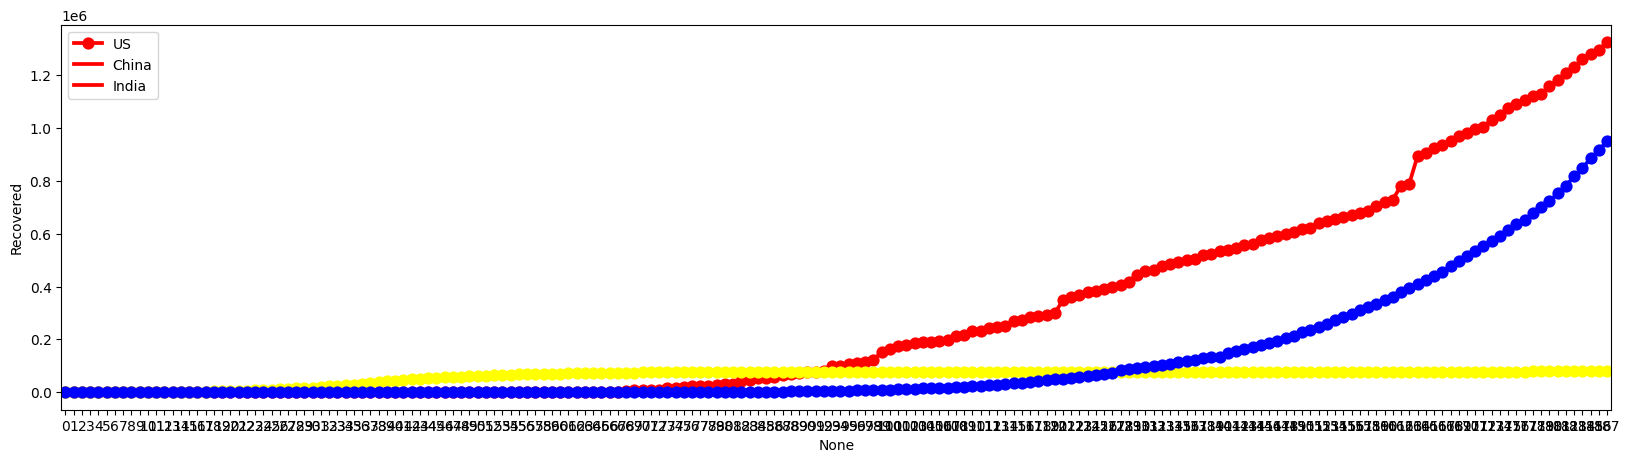

In [ ]:
plt.figure(figsize=(20,5))
sns.pointplot(x=US.index,y=US.Recovered,color='red')
sns.pointplot(x=China.index,y=China.Recovered,color='yellow')
sns.pointplot(x=India.index,y=India.Recovered,color='blue')
plt.legend(['US','China','India'])
plt.show()

# **Model Building**

In [ ]:
!pip install prophet

In [ ]:
df1=pd.read_csv('/content/Covid_19_Clean_Complete.csv',parse_dates=['Date'])
df1

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [ ]:
confirmed=df1.groupby('Date').sum()['Confirmed'].reset_index()
confirmed

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [ ]:
confirmed.columns=['ds','y']
confirmed

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [ ]:
from prophet import Prophet
m=Prophet()

In [ ]:
m.fit(confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd7gf34zw/zxngdz5w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd7gf34zw/yy7tbk17.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75517', 'data', 'file=/tmp/tmpd7gf34zw/zxngdz5w.json', 'init=/tmp/tmpd7gf34zw/yy7tbk17.json', 'output', 'file=/tmp/tmpd7gf34zw/prophet_modelqtjigdss/prophet_model-20250312155421.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:54:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:54:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future=m.make_future_dataframe(periods=20)
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.613281e+03,-1.261607e+05,8.438109e+04,-9.613281e+03,-9.613281e+03,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,0.0,0.0,0.0,-2.067684e+04
1,2020-01-23,-6.933404e+03,-1.152725e+05,1.002516e+05,-6.933404e+03,-6.933404e+03,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,-8.050948e+03
2,2020-01-24,-4.253528e+03,-9.951900e+04,1.121225e+05,-4.253528e+03,-4.253528e+03,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,5.827455e+03
3,2020-01-25,-1.573651e+03,-8.506679e+04,1.183475e+05,-1.573651e+03,-1.573651e+03,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.217668e+04
4,2020-01-26,1.106226e+03,-8.850744e+04,1.193739e+05,1.106226e+03,1.106226e+03,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,8.405020e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,2020-08-12,1.939690e+07,1.918943e+07,1.960498e+07,1.922029e+07,1.958417e+07,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,0.0,0.0,0.0,1.938584e+07
204,2020-08-13,1.960089e+07,1.938156e+07,1.983032e+07,1.940600e+07,1.980498e+07,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,1.959977e+07
205,2020-08-14,1.980488e+07,1.958077e+07,2.004728e+07,1.959394e+07,2.003303e+07,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,1.981496e+07
206,2020-08-15,2.000887e+07,1.978165e+07,2.028245e+07,1.977988e+07,2.025807e+07,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,2.002262e+07


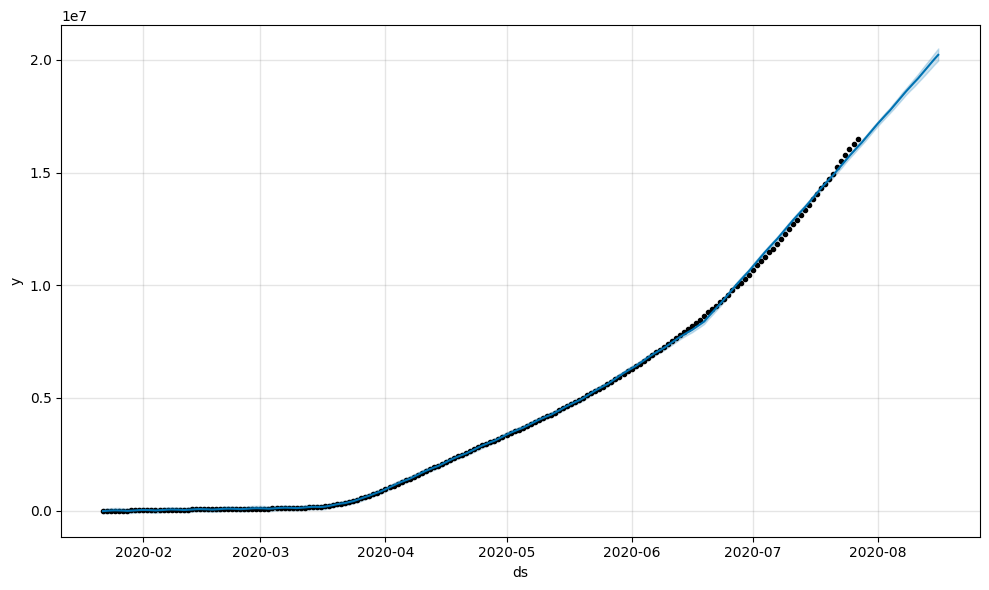

In [ ]:
m.plot(forecast)
plt.show()

In [ ]:
import plotly
import plotly.express as px

In [ ]:
world=df1.groupby('Country/Region')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
world

,Country/Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,1936390,49098,798240,1089052
1,Albania,196702,5708,118877,72117
2,Algeria,1179755,77972,755897,345886
3,Andorra,94404,5423,69074,19907
4,Angola,22662,1078,6573,15011
...,...,...,...,...,...
182,West Bank and Gaza,233461,1370,61124,170967
183,Western Sahara,901,63,648,190
184,Yemen,67180,17707,23779,25694
185,Zambia,129421,2643,83611,43167


In [ ]:
figure=px.choropleth(world,locations='Country/Region',
                     locationmode='country names',
                     color='Confirmed',
                     hover_name='Country/Region',range_color=[1,2000000],
                     color_continuous_scale='reds',
                     title='Countries with Confirmed Cases')
figure.show()